In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from aegomoku.gomoku_game import ConstantBoardInitializer, GomokuGame
from aegomoku.arena import Arena
from aegomoku.interfaces import MctsParams, PolicyParams
from aegomoku.gomoku_players import PolicyAdvisedGraphSearchPlayer
from pathlib import Path

In [17]:
from aegomoku.gomoku_game import RandomBoardInitializer
from aegomoku.policies.topological_value import TopologicalValuePolicy

BOARD_SIZE = 19
rbi = RandomBoardInitializer(BOARD_SIZE, 4, 8, 10, 8, 10)
the_game = GomokuGame(board_size=BOARD_SIZE, initializer=rbi)

model_file = Path.home() / "workspace" / "Project-Ellie" / "DATA" / 'models' / '2_c1.model'
mcts_champion = MctsParams(cpuct=4.0, temperature=0, num_simulations=400)
policy_champion = PolicyParams(model_file_name=model_file, advice_cutoff=.01)
player1 = PolicyAdvisedGraphSearchPlayer("Champion 2_c1", the_game, mcts_champion, policy_champion)

model_file = Path.home() / "workspace" / "Project-Ellie" / "DATA" / 'models' / '3_c2.model'
mcts_challenger = MctsParams(cpuct=4.0, temperature=0, num_simulations=400)
policy_challenger = PolicyParams(model_file_name=model_file, advice_cutoff=.01)
player2 = PolicyAdvisedGraphSearchPlayer("Candidate 3_c2", the_game, mcts_challenger, policy_challenger)




#mcts_champion = MctsParams(cpuct=4.0, temperature=0, num_simulations=400)
#policy_champion = PolicyParams(model_file_name=None, advice_cutoff=.01)
#advisor = TopologicalValuePolicy(board_size=BOARD_SIZE)
#player2 = PolicyAdvisedGraphSearchPlayer("Heuristics", the_game, mcts_champion, policy_params=None, adviser=advisor)

arena = Arena(game=the_game, player1=player1, player2=player2, max_moves=100)

In [18]:
arena.play_game(verbose=2)

Champion 2_c1 to begin with black.
1: Champion 2_c1: J10
2: Candidate 3_c2: J9


KeyboardInterrupt: 

In [15]:
arena_file = Path.home() / "workspace" / "Project-Ellie" / "DATA" / 'arena' / '3_c2.arena'

In [19]:
stats = arena.play_games(100, verbose=1, save_to=arena_file)

Game 1: Champion 2_c1 to begin with black.
Champion 2_c1 (black) won.
[K11, J10, I10, K9, I11, J11, I12, I13, J12, J9, I9, I8, K12, K10, L12, M12, H12]
Game 2: Champion 2_c1 to begin with black.
Champion 2_c1 (black) won.
[K11, I9, K10, J9, K9, K12, J8, I7, K8, K7, I8, L8, L10, J7, H7, M9, N10, J6, I5, L7, M7, H8, M10, J10, O10]
Game 3: Champion 2_c1 to begin with black.
Candidate 3_c2 (white) won.
[I11, I10, K10, I9, J11, H11, L9, I12, M8, N7, K11, G10, L11, M11, J13, J9, K8, F9, E8, G9, H9, G12, F13, G11, G13, G8]
Game 4: Champion 2_c1 to begin with black.
Champion 2_c1 (black) won.
[I9, I10, J9, J11, H9, G9, K10, L11, K9, L9, K11, K12, L12, L13, M14, J13, J10, M13, H8]
Game 5: Champion 2_c1 to begin with black.
Champion 2_c1 (black) won.
[J10, I9, J9, I10, I8, J8, K10, L11, H7, G6, K7, K9, I7, J7, I5, J6, I6, I4, J5, G8, K4, L3, K5, H5, K6, K3, K8]
Game 6: Champion 2_c1 to begin with black.
Candidate 3_c2 (white) won.
[K11, I11, J11, K9, J10, J12, H10, I10, I9, H8, J8, K7, J9, J7, G

In [7]:
stats

{Candidate 3_c1: 22, Champion 2_c1: 18, 'draws': 0}

In [15]:
from pickle import Pickler

with open('1_c3.arena', 'wb+') as f:
    Pickler(f).dump(arena.games)

In [12]:
n = 0

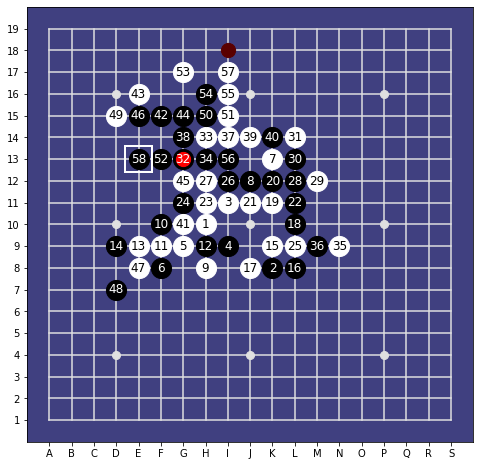

In [42]:
from aegomoku.policies.heuristic_policy import HeuristicPolicy
from aegomoku.utils import analyse_board
moves = arena.games[n]
heuristics = HeuristicPolicy(BOARD_SIZE, cut_off=0.1)
analyse_board(BOARD_SIZE, moves, heuristics, disp_width=8)
n += 1

/home/wgiersche/.local/share/virtualenvs/DeepGomoku-yQC4gx5q/lib/python3.8/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


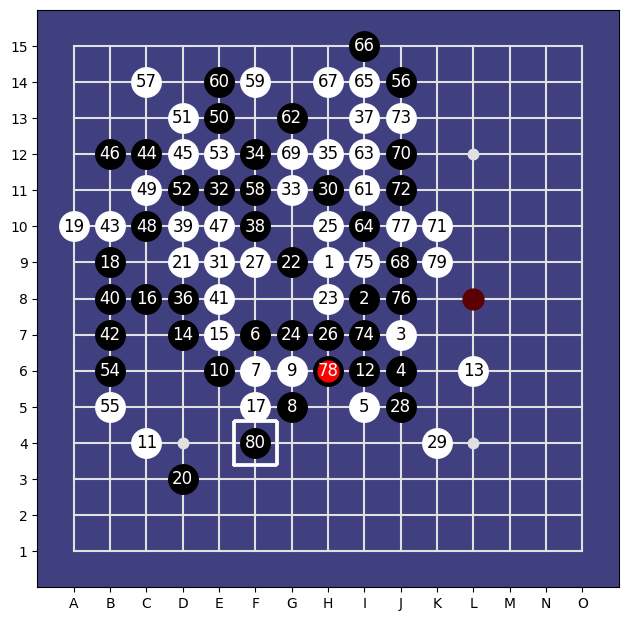

In [9]:
from aegomoku.policies.heuristic_policy import HeuristicPolicy
from aegomoku.utils import analyse_board
moves = arena.games[0]
heuristics = HeuristicPolicy(BOARD_SIZE, cut_off=0.1)
analyse_board(BOARD_SIZE, moves, heuristics, disp_width=7.5)

In [10]:
arena.max_moves

40